In [1]:
# Harbinger Package
# version 1.0.16

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Loading required package: harbinger

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘ggplot2::margin’ by ‘randomForest::margin’ when loading ‘harbinger’”
Warning message:
“replacing previous import ‘dplyr::combine’ by ‘randomForest::combine’ when loading ‘harbinger’”

Attaching package: ‘harbinger’


The following object is masked from ‘package:stats’:

    optimize


The following object is masked from ‘package:base’:

    transform




In [2]:
#loading the example database
data(har_examples_multi)

In [3]:
#Using the time series 9
dataset <- har_examples_multi[[1]]
head(dataset)

,x,y,event
,<dbl>,<dbl>,<lgl>
1,1.080605,1,FALSE
2,1.114045,0,FALSE
3,1.147040,1,FALSE
4,1.179576,0,FALSE
5,1.211640,1,FALSE
6,1.243220,0,FALSE


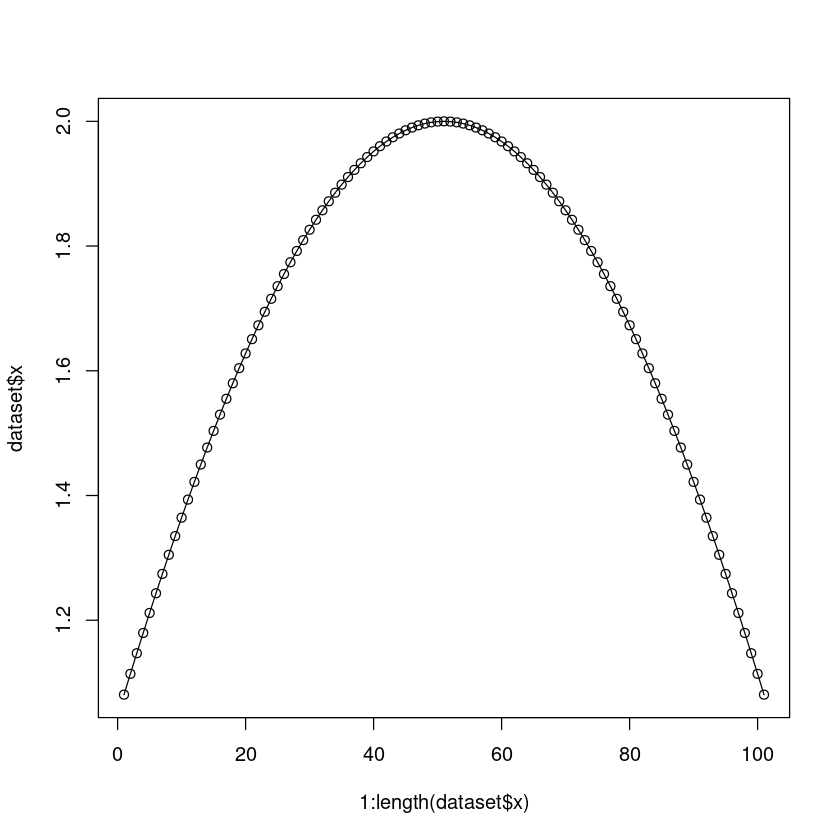

In [5]:
#ploting series x and y
plot(x = 1:length(dataset$x), y = dataset$x)
lines(x = 1:length(dataset$x), y = dataset$x)

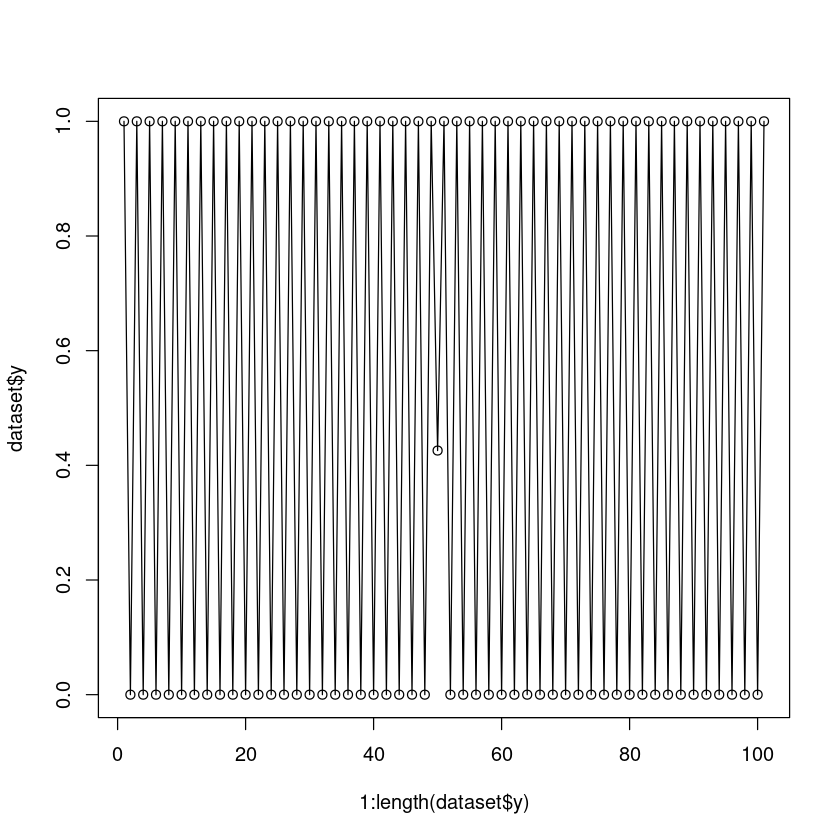

In [6]:
plot(x = 1:length(dataset$y), y = dataset$y)
lines(x = 1:length(dataset$y), y = dataset$y)

In [9]:
#analysis of first variable isolated
model <- har_arima()
model <- fit(model, dataset$x)
detection <- detect(model, dataset$x)
print(detection |> dplyr::filter(event==TRUE))
evaluation <- evaluate(model, detection$event, dataset$event)
print(evaluation$confMatrix)

[1] idx   event type 
<0 rows> (or 0-length row.names)
          event      
detection TRUE  FALSE
TRUE      0     0    
FALSE     1     100  


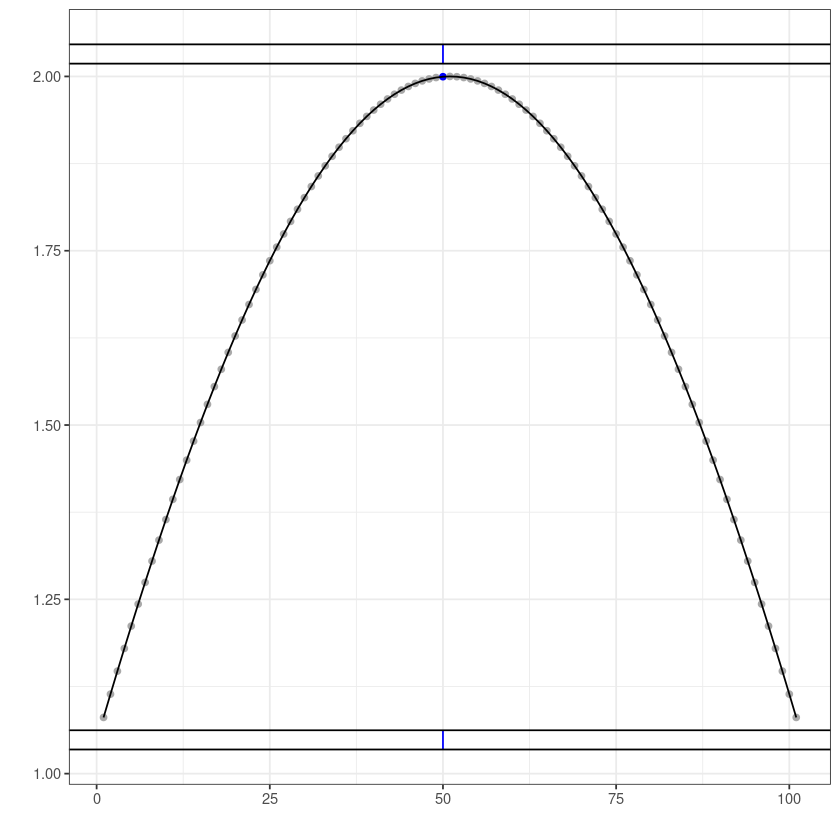

In [10]:
#first variable isolated did not identify event
grf <- plot.harbinger(model, dataset$x, detection, dataset$event)
plot(grf)

In [11]:
#analysis of second variable isolated
model <- har_arima()
model <- fit(model, dataset$y)
detection <- detect(model, dataset$y)
print(detection |> dplyr::filter(event==TRUE))
evaluation <- evaluate(model, detection$event, dataset$event)
print(evaluation$confMatrix)

[1] idx   event type 
<0 rows> (or 0-length row.names)
          event      
detection TRUE  FALSE
TRUE      0     0    
FALSE     1     100  


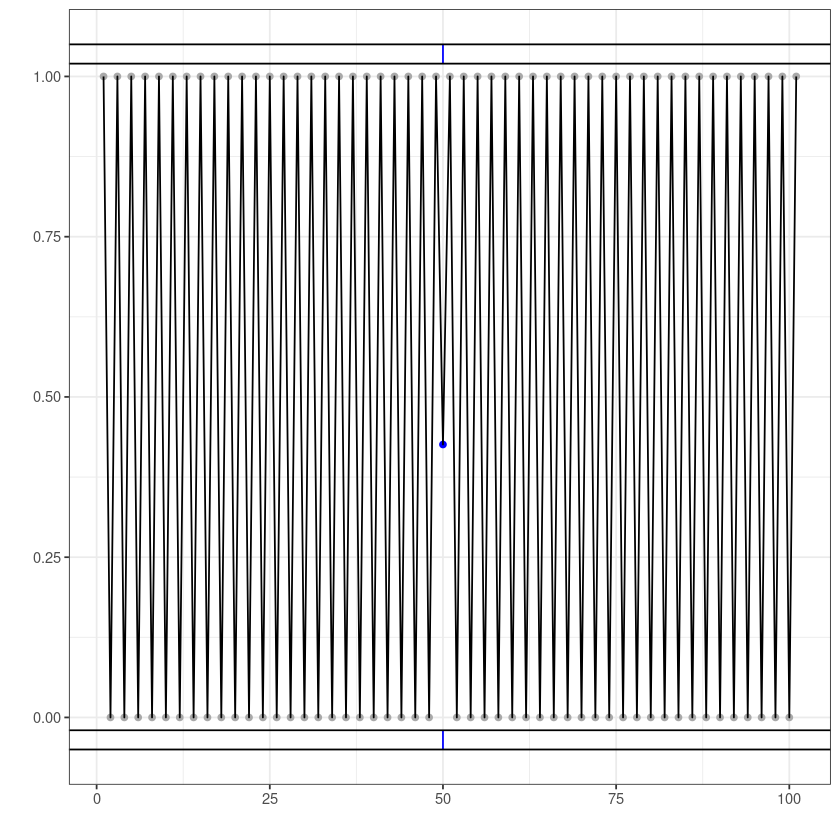

In [13]:
#second variable isolated did not identify event
grf <- plot.harbinger(model, dataset$y, detection, dataset$event)
plot(grf)

In [15]:
# establishing har_multi_pca method 
  model <- har_multi_pca()

In [16]:
# fitting the model using the two columns of the dataset
  model <- fit(model, dataset[,1:2]) 

In [17]:
# making detections using har_multi_pca
  detection <- detect(model, dataset[,1:2])

In [18]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1  50  TRUE anomaly
2  59  TRUE anomaly


In [19]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     1    
FALSE     0     99   


In [20]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)

ERROR: Error in data.frame(time = idx, serie = serie, FP = detection$event, TP = FALSE, : arguments imply differing number of rows: 2, 0, 101, 1
